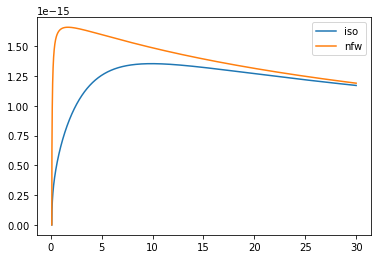

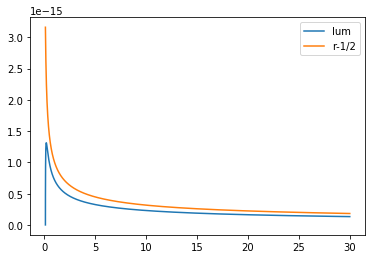

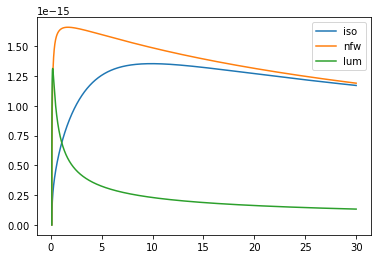

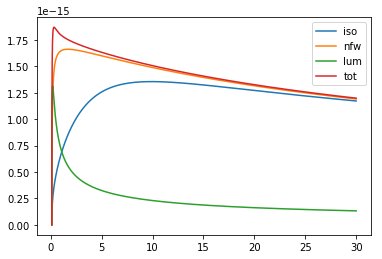

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import *
from scipy import *
import scipy as sp

def Numerical():
    #constants
    G = (0.4)*(10**(-38)) #units: cubic-kpc / solarmass-s^2
    
    #Milky Way Properties:
    Rdisk = 15 #kpc
    hdisk = 0.3 #kpc
    
    
    
    #define R  as a linear space
    R_min = 0.1
    R_max = 30
    R_step = 10000
    R = np.linspace(R_min,R_max,R_step)
    
    
    #NFW DM density profile
    r0n = 25 #kpc
    p0n = 5*(10**6) #units: solarmass/cubic-kpc
    pNFW = p0n*(r0n/R)*((1+(R/r0n)))**(-2) #R = distance from galactic center
    
    #isothermal density profile:
    r0iso = 5 #kpc
    p0iso = 36.3*(10**6) #solar masses/cubic-kpc
    piso = p0iso/ (1 + ((R/r0iso)**2)) 
    
    #density profile for luminous matter
    plum = (10**6)*R**(-3.5) #power law density profile
    
    #total density:
    ptot = pNFW+plum
    
    J = 2*np.pi*R #The Jacodian for the integral
    
    U_NFW = J*pNFW #the integrand for NFW profile
    U_iso = J*piso #integrand for isothermal profile
    U_lum = J*plum
    U_tot = J*ptot
    
    #Mass
    M_iso =  cumtrapz(U_iso, x=R, dx = R_step, initial = 0)
    M_NFW = cumtrapz(U_NFW, x=R, dx = R_step, initial = 0)
    M_lum = cumtrapz(U_lum, x=R, dx = R_step, initial = 0)
    M_tot = cumtrapz(U_tot, x=R, dx = R_step, initial = 0)
    
    V_iso = np.sqrt((G*M_iso)/R)
    V_NFW = np.sqrt((G*M_NFW)/R)
    V_lum = np.sqrt((G*M_lum)/R)
    V_tot = np.sqrt((G*M_tot)/R)

    
    plt.figure
    plt.plot(R,V_iso)
    plt.plot(R,V_NFW)
    plt.legend(['iso','nfw'])
    plt.show()

    plt.figure
    plt.plot(R,V_lum)
    plt.plot(R,(1*10**-15)/sqrt(R))
    plt.legend(['lum','r-1/2'])
    plt.show()
    
    plt.figure
    plt.plot(R,V_iso)
    plt.plot(R,V_NFW)
    plt.plot(R,V_lum)
    plt.legend(['iso','nfw','lum'])
    plt.show()
    
    plt.figure
    plt.plot(R,V_iso)
    plt.plot(R,V_NFW)
    plt.plot(R,V_lum)
    plt.plot(R,V_tot)
    plt.legend(['iso','nfw','lum','tot'])
    plt.show()
    
    

if __name__ == '__Numerical__':
    Numerical()
Numerical()